<a href="https://colab.research.google.com/github/Santhosh190702/final-assignment/blob/main/Instacart_market_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AISLES.xlsx to AISLES.xlsx
Saving departments.xlsx to departments.xlsx
Saving order_products__prior.xlsx to order_products__prior.xlsx
Saving order_products__train.xlsx to order_products__train.xlsx
Saving orders.xlsx to orders.xlsx
Saving products.xlsx to products.xlsx


In [ ]:
####  READING FILES

In [ ]:
aisles =pd.read_excel('/content/AISLES.xlsx')
department =pd.read_excel('/content/departments.xlsx')
order_products__prior = pd.read_excel('/content/order_products__prior.xlsx')
order_products__train = pd.read_excel('/content/order_products__train.xlsx')
orders = pd.read_excel('/content/orders.xlsx')
products = pd.read_excel('/content/products.xlsx')


In [ ]:
# Check the structure of the data
print(orders.head())
print(order_products__prior.head())
print(products.head())

# Check for missing values
print(orders.isnull().sum())


   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
   product_id                                

In [ ]:
# Check the structure of the data
print(orders.head())
print(order_products__prior.head())
print(products.head())

# Check for missing values
print(orders.isnull().sum())


   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
   product_id                                

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49687 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
department.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
order_products__prior.info()
order_products__train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1048575 non-null  int64
 1   product_id         1048575 non-null  int64
 2   add_to_cart_order  1048575 non-null  int64
 3   reordered          1048575 non-null  int64
dtypes: int64(4)
memory usage: 32.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1048575 non-null  int64
 1   product_id         1048575 non-null  int64
 2   add_to_cart_order  1048575 non-null  int64
 3   reordered          1048575 non-null  int64
dtypes: int64(4)
memory usage: 32.0 MB


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027837 entries, 0 to 1027836
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1027837 non-null  int64  
 1   user_id                 1027837 non-null  int64  
 2   eval_set                1027837 non-null  object 
 3   order_number            1027837 non-null  int64  
 4   order_dow               1027837 non-null  int64  
 5   order_hour_of_day       1027837 non-null  int64  
 6   days_since_prior_order  985475 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 54.9+ MB


In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
# Check for missing values again # cleaning data
print(orders.isnull().sum())

# Summary statistics
print(orders.describe())


In [ ]:

orders.dropna()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
...,...,...,...,...,...,...,...
1027832,2625264,63099,train,14,0,13,30.0
1027833,2719402,63100,prior,2,0,8,14.0
1027834,2855250,63100,prior,3,2,13,16.0
1027835,2355832,63100,prior,4,5,16,30.0


In [ ]:
orders.fillna(0)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
1027832,2625264,63099,train,14,0,13,30.0
1027833,2719402,63100,prior,2,0,8,14.0
1027834,2855250,63100,prior,3,2,13,16.0
1027835,2355832,63100,prior,4,5,16,30.0


In [ ]:
# Check for missing values in each file
print("Orders missing values:\n", orders.isnull().sum())
print("Order Products Prior missing values:\n", order_products__prior.isnull().sum())
print("Order Products Train missing values:\n", order_products__train.isnull().sum())
print("Products missing values:\n", products.isnull().sum())
print("Aisles missing values:\n", aisles.isnull().sum())
print("Departments missing values:\n", department.isnull().sum())


Orders missing values:
 order_id                      0
user_id                       0
eval_set                      0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    42362
dtype: int64
Order Products Prior missing values:
 order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
Order Products Train missing values:
 order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
Products missing values:
 product_id       0
product_name     1
aisle_id         0
department_id    0
dtype: int64
Aisles missing values:
 aisle_id    0
aisle       0
dtype: int64
Departments missing values:
 department_id    0
department       0
dtype: int64


In [ ]:
# Replace missing values with 0 (indicates first order)
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)


In [ ]:
order_products__prior.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
order_products__prior.sample(5)

,order_id,product_id,add_to_cart_order,reordered
420057,44470,13535,11,1
611094,64617,3640,19,0
506636,53578,38049,11,0
836528,88598,35898,4,0
512630,54177,8025,7,1


In [ ]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
order_products__train.sample(5)


,order_id,product_id,add_to_cart_order,reordered
242971,593201,1700,2,1
933275,2303090,13598,1,1
358161,871225,17706,15,0
485235,1190334,14218,1,0
388901,949365,28745,16,0


In [ ]:
# Merge products with aisles and departments
product_details = products.merge(aisles, on="aisle_id").merge(department, on="department_id")

# Merge orders with order_products__prior
orders_products = order_products__prior.merge(product_details, on="product_id")

# Preview merged data
print(orders_products.head())


   order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   
2         2        9327                  3          0          Garlic Powder   
3         2       45918                  4          1         Coconut Butter   
4         2       30035                  5          0      Natural Sweetener   

   aisle_id  department_id               aisle  department  
0        86             16                eggs  dairy eggs  
1        83              4    fresh vegetables     produce  
2       104             13   spices seasonings      pantry  
3        19             13       oils vinegars      pantry  
4        17             13  baking ingredients      pantry  


In [ ]:
train_orders = orders.merge(order_products__train, on = 'order_id', how = 'inner')

In [ ]:
train_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1


In [ ]:
train_orders.drop(['eval_set', 'add_to_cart_order', 'order_id'], axis = 1, inplace = True)

In [ ]:
train_users = train_orders.user_id.unique()
train_users[:10]

#keeping only train_users in the data

array([ 1,  2,  5,  7,  8,  9, 10, 13, 14, 17])

In [ ]:
###### EDA

In [ ]:
order_number = orders.groupby('user_id')['order_number'].max()
order_number = order_number.value_counts()

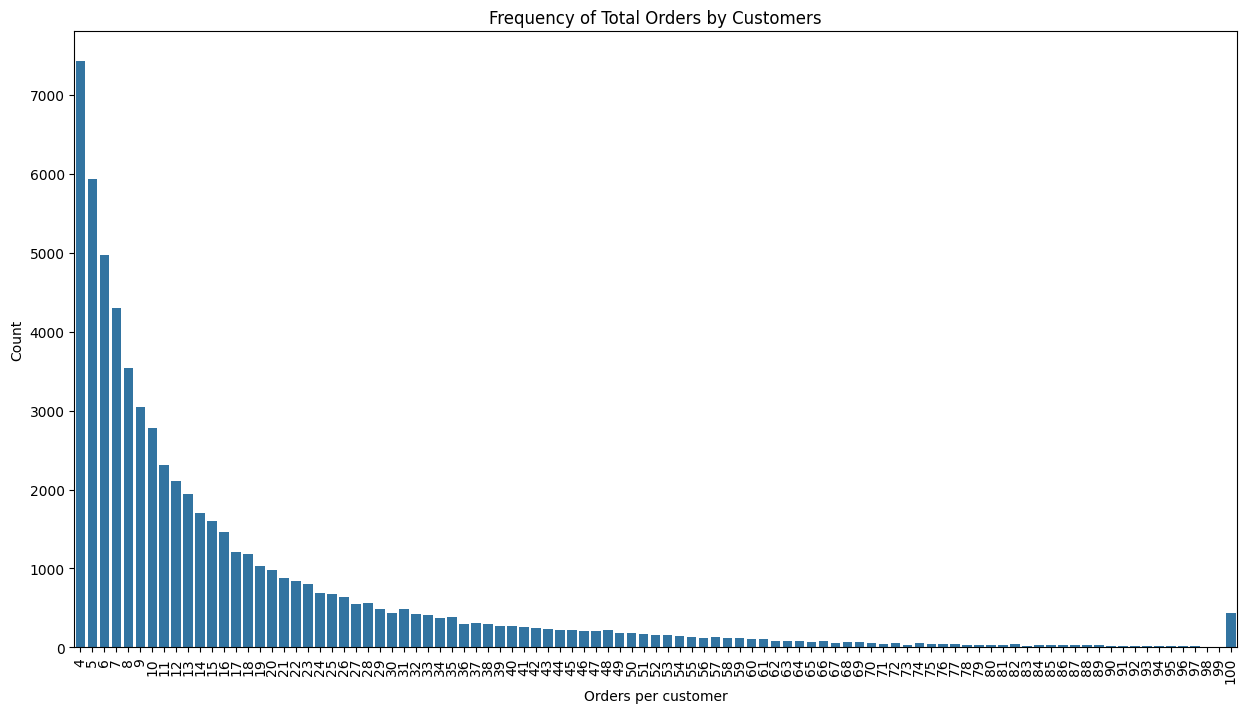

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x = order_number.index, y = order_number.values)
ax.set_xlabel('Orders per customer')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
ax.set_title('Frequency of Total Orders by Customers')
fig.savefig('Frequency of Total Orders by Customers.png')

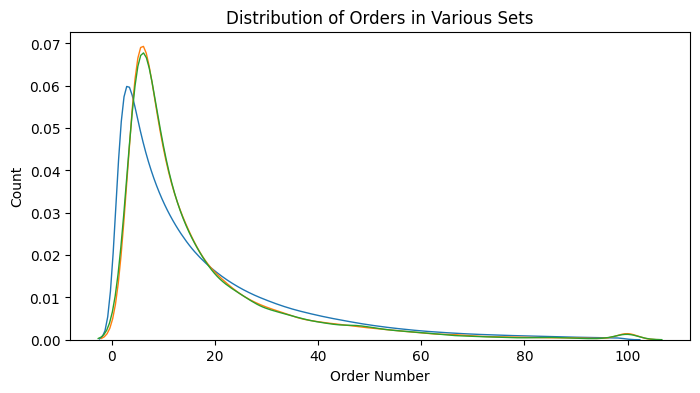

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'prior'], label = "Prior set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'train'], label = "Train set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'test'], label = "Test set", lw = 1)
ax.set_xlabel('Order Number')
ax.set_ylabel('Count')
ax.tick_params(axis = 'both', labelsize = 10)
ax.set_title('Distribution of Orders in Various Sets')
fig.savefig('Distribution of Orders in Various Sets.png')
plt.show()

In [ ]:
import pandas as pd

# Sample DataFrame with a 'day_of_week' column (0 for Sunday, 1 for Monday, etc.)
data = {'day_of_week': [0, 1, 2, 3, 4, 5, 6, 1, 3]}
df = pd.DataFrame(data)

# Map day numbers to day names
day_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Apply mapping
df['day_name'] = df['day_of_week'].map(day_mapping)

# Print the updated DataFrame
print(df)


   day_of_week   day_name
0            0     Sunday
1            1     Monday
2            2    Tuesday
3            3  Wednesday
4            4   Thursday
5            5     Friday
6            6   Saturday
7            1     Monday
8            3  Wednesday


<ipython-input-30-9021c7294418>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_dow', data=orders, palette='viridis')


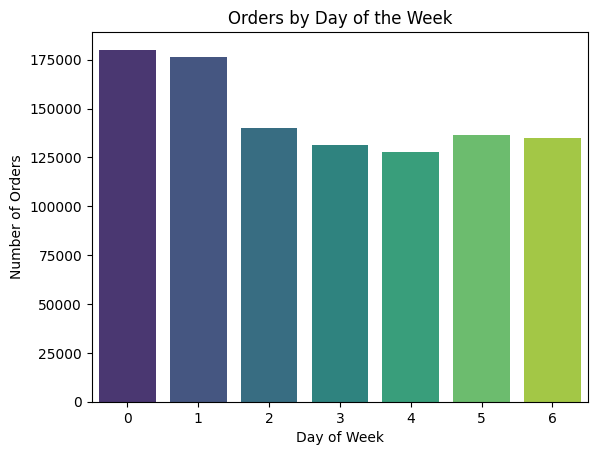

In [ ]:
# Distribution of orders by day of the week
sns.countplot(x='order_dow', data=orders, palette='viridis')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()


<ipython-input-31-a4354a61064e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_hour_of_day', data=orders, palette='plasma')


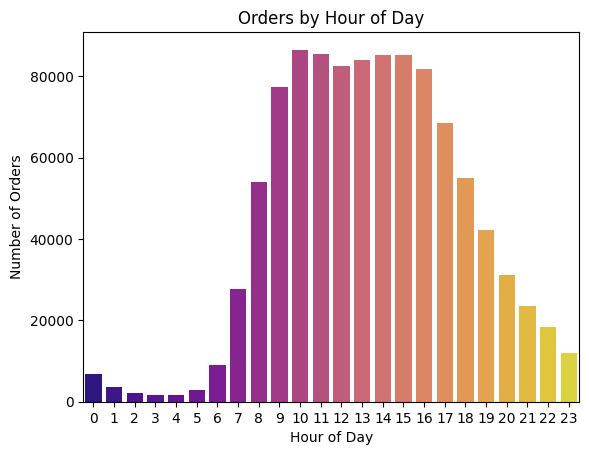

In [ ]:
# Distribution of orders by hour of the day
sns.countplot(x='order_hour_of_day', data=orders, palette='plasma')
plt.title('Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.show()


In [ ]:
### Reorder Frequency

# Percentage of reordered products
reorder_percentage = order_products__prior['reordered'].mean() * 100
print(f"Percentage of reordered products: {reorder_percentage:.2f}%")


Percentage of reordered products: 59.05%


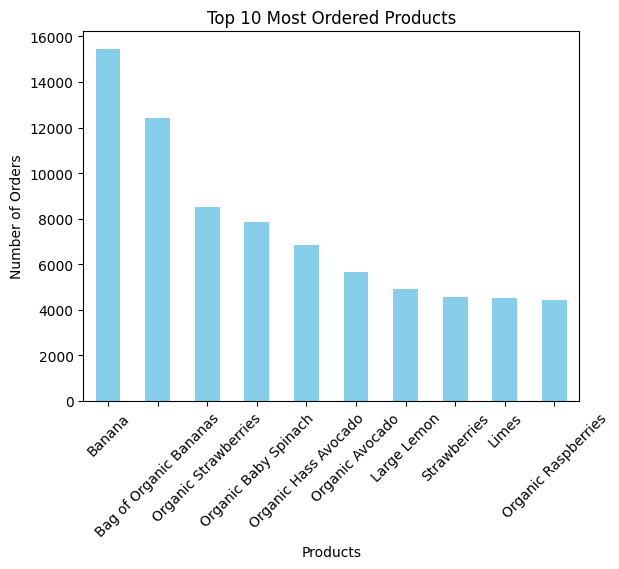

In [ ]:
  ###  Top 10 Most Ordered Products

# Most popular products
top_products = orders_products['product_name'].value_counts().head(10)
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Products')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


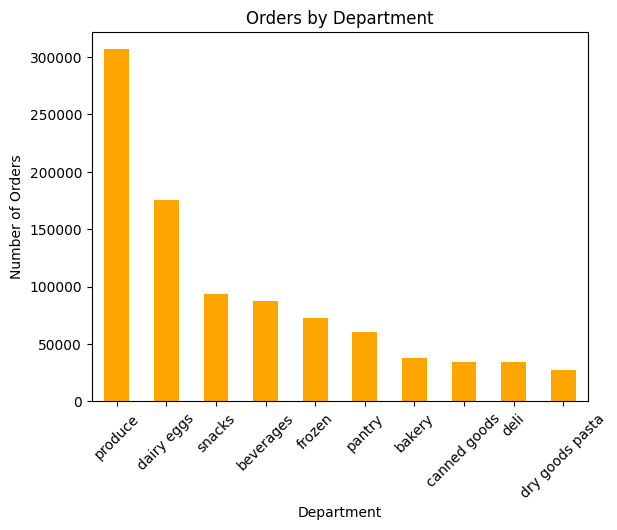

In [ ]:
# Orders by department ( Popular Departments )
dept_orders = orders_products['department'].value_counts().head(10)
dept_orders.plot(kind='bar', color='orange')
plt.title('Orders by Department')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


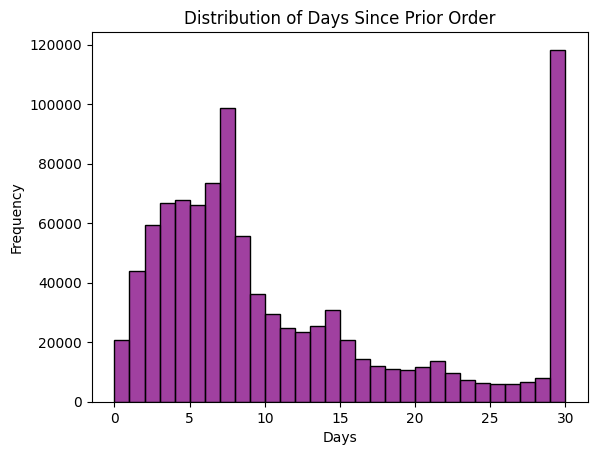

In [ ]:
## Customer Behavior Analysis (Time Between Orders)

sns.histplot(orders['days_since_prior_order'].dropna(), bins=30, kde=False, color='purple')
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()


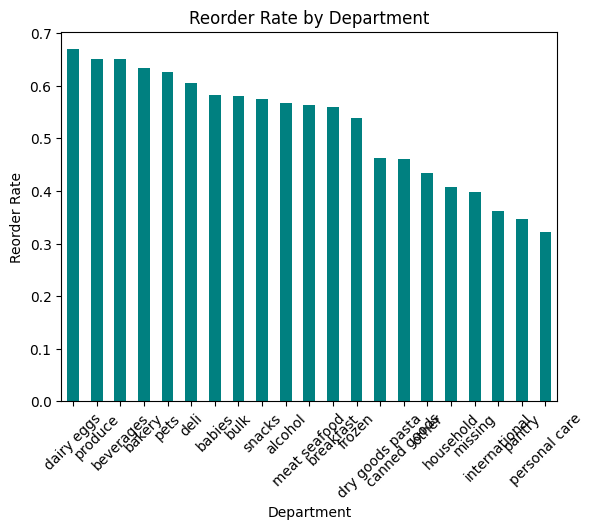

In [ ]:
# Analyze reordering trends
reorder_trends = orders_products.groupby('department')['reordered'].mean().sort_values(ascending=False)
reorder_trends.plot(kind='bar', color='teal')
plt.title('Reorder Rate by Department')
plt.xlabel('Department')
plt.ylabel('Reorder Rate')
plt.xticks(rotation=45)
plt.show()


In [ ]:

orders.shape
products.shape


(49688, 4)

In [ ]:
products.value_counts()

,,,,count
product_id,product_name,aisle_id,department_id,
1,Chocolate Sandwich Cookies,61,19,1
33143,Original Probiotic Dairy Drink,70,11,1
33121,Oikos Yogurt Drink Strawberry,120,16,1
33122,Peanut Butter Dark Chocolate Protein Chewy Bars,3,19,1
33123,Pop Corn White,23,19,1
...,...,...,...,...
16567,Premium Enriched Egg Noodles Barley Shape,33,6,1
16568,Dishwasher Detergent,74,17,1
16569,Hummus Original,67,20,1


In [ ]:
orders.value_counts()

,,,,,,,count
order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,
6,22352,prior,4,1,12,30.0,1
2282599,24276,prior,15,1,13,8.0,1
2282283,39247,prior,11,6,1,4.0,1
2282288,9661,prior,8,4,8,30.0,1
2282292,60172,prior,17,1,15,6.0,1
...,...,...,...,...,...,...,...
1141335,34633,prior,49,0,8,8.0,1
1141336,5342,prior,5,2,16,1.0,1
1141340,26473,prior,25,0,14,12.0,1


In [ ]:
order_products__prior.value_counts()

order_id  product_id  add_to_cart_order  reordered
2         1819        8                  1            1
73931     43421       8                  1            1
73930     34126       12                 1            1
          35221       6                  1            1
          35227       3                  0            1
                                                     ..
36915     21137       3                  0            1
          24852       1                  0            1
          28092       2                  1            1
          30662       7                  0            1
110720    35594       2                  0            1
Name: count, Length: 1048575, dtype: int64

In [ ]:
order_products__train.value_counts()

order_id  product_id  add_to_cart_order  reordered
1         10246       3                  0            1
1718542   7736        1                  0            1
1718441   41178       15                 0            1
          41486       11                 0            1
          42736       13                 0            1
                                                     ..
851588    44042       21                 0            1
          46842       24                 0            1
          46941       14                 1            1
851641    2913        4                  1            1
2593147   44142       3                  0            1
Name: count, Length: 1048575, dtype: int64

   day_of_week   day_name
0            0     Sunday
1            1     Monday
2            2    Tuesday
3            3  Wednesday
4            4   Thursday
5            5     Friday
6            6   Saturday
7            1     Monday
8            3  Wednesday


In [ ]:
# Top products by total orders
top_products = order_products__prior['product_id'].value_counts().head(10).reset_index()
top_products.columns = ['product_id', 'order_count']

# Merge with product names
top_products = top_products.merge(products[['product_id', 'product_name']], on='product_id')
print(top_products)

# Most reordered products
reordered_products = order_products__prior.groupby('product_id')['reordered'].mean().reset_index()
reordered_products.columns = ['product_id', 'reorder_rate']
top_reordered_products = reordered_products.sort_values(by='reorder_rate', ascending=False).head(10)
top_reordered_products = top_reordered_products.merge(products[['product_id', 'product_name']], on='product_id')
print(top_reordered_products)


   product_id  order_count            product_name
0       24852        15450                  Banana
1       13176        12409  Bag of Organic Bananas
2       21137         8528    Organic Strawberries
3       21903         7852    Organic Baby Spinach
4       47209         6857    Organic Hass Avocado
5       47766         5646         Organic Avocado
6       47626         4928             Large Lemon
7       16797         4587            Strawberries
8       26209         4526                   Limes
9       27966         4420     Organic Raspberries
   product_id  reorder_rate                                    product_name
0       22267           1.0                            Yummy Berry Kids Tea
1       45040           1.0                              Head Lock Mega Gel
2       15279           1.0                                  Soy Milk Plain
3       45028           1.0                    Honey Mustard Dressing & Dip
4       25219           1.0   Original Miracle Whip Dressin

<ipython-input-14-c9afff8f66ab>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='order_count', y='product_name', palette='cool')


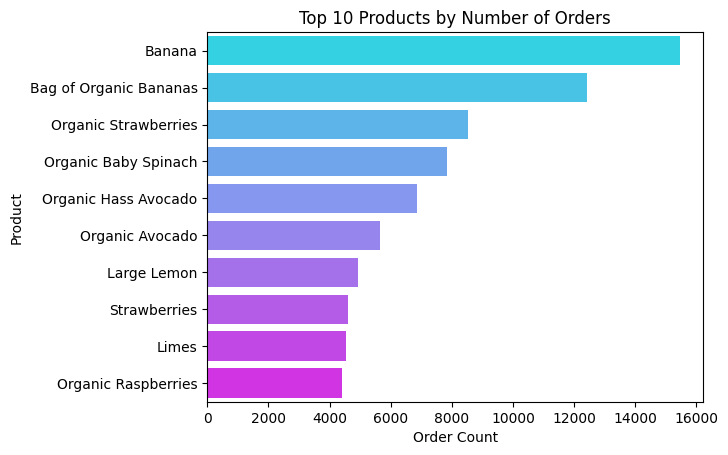

In [ ]:
sns.barplot(data=top_products, x='order_count', y='product_name', palette='cool')
plt.title('Top 10 Products by Number of Orders')
plt.xlabel('Order Count')
plt.ylabel('Product')
plt.show()


In [ ]:
sns.barplot(data=top_reordered_products, x='reorder_rate', y='product_name', palette='magma')
plt.title('Top 10 Reordered Products')
plt.xlabel('Reorder Rate')
plt.ylabel('Product')
plt.show()


In [ ]:
# Filter the top 20 products with the highest reorders
top_20_reorders = reorder_analysis.head(20)

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='product_name', y='reordered', data=top_20_reorders, marker='o')

# Add chart labels and styling
plt.xticks(rotation=90)
plt.title("Top 20 Products by Reorders")
plt.xlabel("Product Name")
plt.ylabel("Number of Reorders")
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Group by product_name and calculate total reorders
reorder_analysis = orders_products.groupby('product_name')['reordered'].sum().reset_index()

# Sort values by total reorders (descending)
reorder_analysis = reorder_analysis.sort_values(by='reordered', ascending=False)

# Display the top 10 products with the highest reorders
print("Top 10 Reordered Products:")
print(reorder_analysis.head(10))


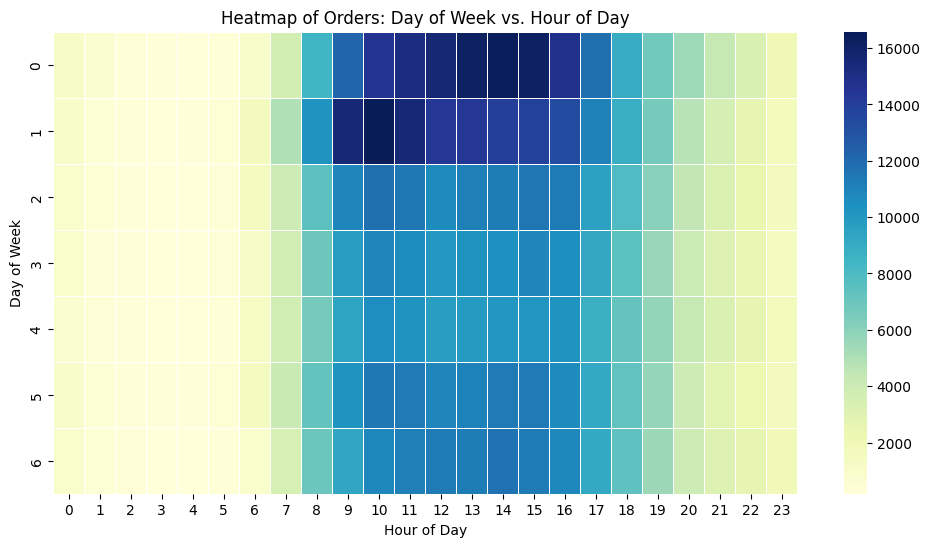

In [ ]:
# Pivot table for heatmap
heatmap_data = orders.pivot_table(index='order_dow', columns='order_hour_of_day', values='order_id', aggfunc='count')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, annot=False)
plt.title('Heatmap of Orders: Day of Week vs. Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


In [ ]:
# Display the first few rows of the DataFrame
print(orders_products.head())

# Check the shape of the DataFrame (rows and columns)
print("Shape of DataFrame:", orders_products.shape)


   order_id  product_id  add_to_cart_order  reordered           product_name  \
0         2       33120                  1          1     Organic Egg Whites   
1         2       28985                  2          1  Michigan Organic Kale   
2         2        9327                  3          0          Garlic Powder   
3         2       45918                  4          1         Coconut Butter   
4         2       30035                  5          0      Natural Sweetener   

   aisle_id  department_id               aisle  department  
0        86             16                eggs  dairy eggs  
1        83              4    fresh vegetables     produce  
2       104             13   spices seasonings      pantry  
3        19             13       oils vinegars      pantry  
4        17             13  baking ingredients      pantry  
Shape of DataFrame: (1048575, 9)


In [ ]:
import os

# Print the current working directory
print("Current working directory:", os.getcwd())


Current working directory: /content


In [ ]:
# Save the DataFrame to a CSV file
orders_products.to_csv("merged_orders_products.csv", index=False)

print("File saved successfully!")


File saved successfully!


In [ ]:
# Corrected file path with double backslashes
file_path = "C:\\Users\\Sanjay\\Desktop\\Guvi\\5th Project\\EXCEL DATA\\merged_orders_products.csv"
orders_products.to_csv(file_path, index=False)

print(f"File saved successfully at {file_path}")


File saved successfully at C:\Users\Sanjay\Desktop\Guvi\5th Project\EXCEL DATA\merged_orders_products.csv


In [ ]:
# Corrected file path using a raw string
file_path = r"C:\Users\Sanjay\Desktop\Guvi\5th Project\EXCEL DATA\merged_orders_products.csv"
orders_products.to_csv(file_path, index=False)

print(f"File saved successfully at {file_path}")


File saved successfully at C:\Users\Sanjay\Desktop\Guvi\5th Project\EXCEL DATA\merged_orders_products.csv
